In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error

#reading the dataset

In [ ]:
salary = pd.read_csv("/content/Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#EDA

In [ ]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


observed no missing values and no need to change column names and data types as well. 

#checking for duplicated values

In [ ]:
salary[salary.duplicated()].shape

(0, 2)

In [ ]:
salary[salary.duplicated()]

,YearsExperience,Salary


no duplicated values are present in salary dataset. 

#checking for outliers

<Axes: >

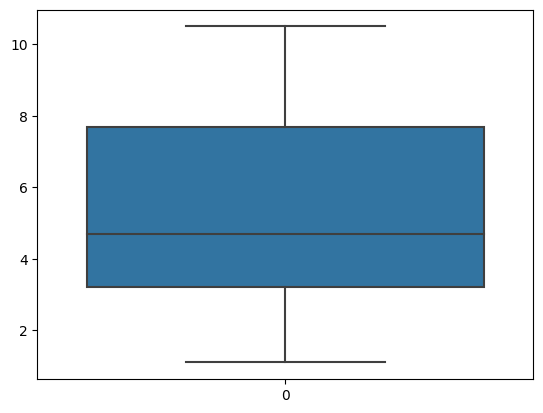

In [ ]:
sns.boxplot(salary['YearsExperience'])

<Axes: >

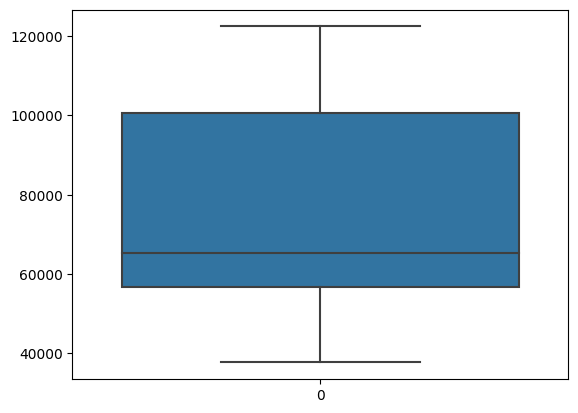

In [ ]:
sns.boxplot(salary['Salary'])

<ipython-input-10-ab2eeefaaf36>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

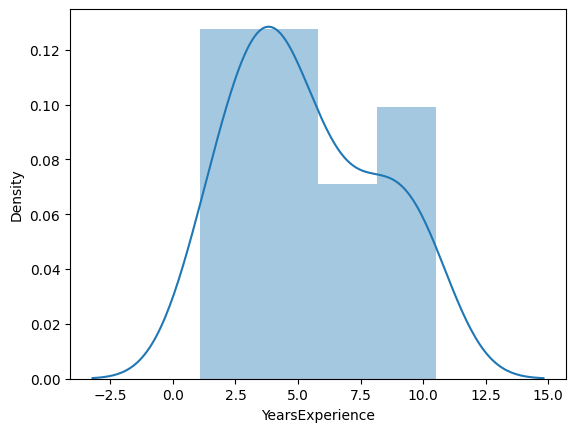

In [ ]:
sns.distplot(salary['YearsExperience'])

<ipython-input-13-36cdd9539e89>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

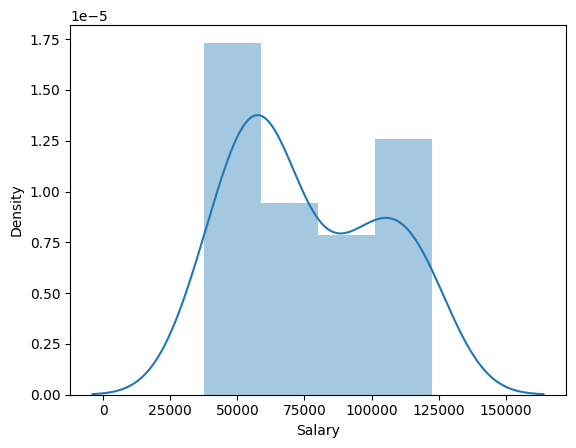

In [ ]:
sns.distplot(salary['Salary'])

No outliers and slightly right skewed data

# finding correlation

In [ ]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


observed good correlation between yearsExperience and salary

#Building linear regression models using OLS

In [ ]:
model = sm.ols("Salary~YearsExperience",data=salary).fit()
print(model.params)
print("****************")
print(model.rsquared,model.rsquared_adj)
print("*******************")
print(model.tvalues,'\n',model.pvalues)

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64
****************
0.9569566641435086 0.9554194021486339
*******************
Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


rsquare value is 0.95 which is good model but lets check RMSE value also.

In [ ]:
#RMSE for model without transformation data
model_pred = model.predict(salary[['YearsExperience']])
model_rmse = np.sqrt(mean_squared_error(salary[['Salary']], model_pred))
model_rmse

5592.043608760662

#checking rsquared and RMSE values with other models after data transformation

In [ ]:
#square root transformation
model1 = sm.ols("Salary~np.sqrt(YearsExperience)",data=salary).fit()
print(model1.params)
print("****************")
print(model1.rsquared,model1.rsquared_adj)
print("*******************")
print(model1.tvalues,'\n',model1.pvalues)

Intercept                  -16055.769117
np.sqrt(YearsExperience)    41500.680583
dtype: float64
****************
0.9310009544993526 0.9285367028743294
*******************
Intercept                   -3.262308
np.sqrt(YearsExperience)    19.437148
dtype: float64 
 Intercept                   2.906965e-03
np.sqrt(YearsExperience)    8.565358e-18
dtype: float64


In [ ]:
#RMSE for model with square root transformation data
model1_pred = model1.predict(np.sqrt(salary[['YearsExperience']]))
model1_rmse = np.sqrt(mean_squared_error(salary[['Salary']], model1_pred))
model1_rmse

36095.716892211

In [ ]:
#cube root transformation 
model2 = sm.ols("Salary~np.cbrt(YearsExperience)",data=salary).fit()
print(model2.params)
print("****************")
print(model2.rsquared,model2.rsquared_adj)
print("*******************")
print(model2.tvalues,'\n',model2.pvalues)

Intercept                  -57049.503555
np.cbrt(YearsExperience)    78964.327230
dtype: float64
****************
0.9113098800320786 0.90814237574751
*******************
Intercept                   -7.140530
np.cbrt(YearsExperience)    16.961897
dtype: float64 
 Intercept                   9.043071e-08
np.cbrt(YearsExperience)    2.907409e-16
dtype: float64


In [ ]:
#RMSE for model with cube root transformation data
model2_pred = model2.predict(np.cbrt(salary[['YearsExperience']]))
model2_rmse = np.sqrt(mean_squared_error(salary[['Salary']], model2_pred))
model2_rmse

44836.557722064885

In [ ]:
#log transformation
model3 = sm.ols("Salary~np.log(YearsExperience)",data=salary).fit()
print(model3.params)
print("****************")
print(model3.rsquared,model3.rsquared_adj)
print("*******************")
print(model3.tvalues,'\n',model3.pvalues)

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64
****************
0.8538888828756969 0.8486706286926861
*******************
Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 
 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [ ]:
#RMSE for model with log transformation data
model3_pred = model3.predict(np.log(salary[['YearsExperience']]))
model3_rmse = np.sqrt(mean_squared_error(salary[['Salary']], model3_pred))
model_rmse

54765.3545456809

RMSE value is low for model1(sqrt data transformation) compare to all other models but Rsquare value is high for model without any data transformation compare to other models.

#predicting values

In [ ]:
#predicting without data transformation.
predicted = pd.DataFrame()
predicted['YearsExperience'] = salary['YearsExperience']
predicted['Salary'] = salary['Salary']
predicted['predicted_salary'] = pd.DataFrame(model.predict(salary[['YearsExperience']]))
predicted

,YearsExperience,Salary,predicted_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [ ]:
#predicting with square root data transformation.
predicted = pd.DataFrame()
predicted['YearsExperience'] = np.sqrt(salary['YearsExperience'])
predicted['Salary'] = salary['Salary']
predicted['predicted_salary'] = pd.DataFrame(model1.predict(predicted[['YearsExperience']]))
predicted

,YearsExperience,Salary,predicted_salary
0,1.048809,39343.0,26445.645974
1,1.140175,46205.0,28258.241456
2,1.224745,37731.0,29872.283740
3,1.414214,43525.0,33297.135510
4,1.483240,39891.0,34487.216107
5,1.702939,56642.0,38101.245793
6,1.732051,60150.0,38562.198118
7,1.788854,54445.0,39450.586463
8,1.788854,64445.0,39450.586463
9,1.923538,57189.0,41502.224928
